<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/dbda/ch08-basic-models/two_coins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install arviz==0.6.1
!pip install pymc3==3.8
!pip install Theano==1.0.4

import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az

az.style.use('arviz-darkgrid')
%matplotlib inline

In [2]:
!rm -rf data-science-hw
!git clone https://github.com/ctarrington/data-science-hw.git

base_path = './data-science-hw/dbda/ch08-basic-models/'
data = pd.read_csv(base_path+'data/flips-by-person.csv')

Cloning into 'data-science-hw'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 81 (delta 23), reused 16 (delta 3), pack-reused 0
Unpacking objects: 100% (81/81), done.


In [3]:
flips = data['flip'].values
idx = pd.Categorical(data['name'], categories=['Reginald', 'Tony']).codes
groups = len(np.unique(idx))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [θ]
Sampling chain 1, 0 divergences: 100%|██████████| 2500/2500 [00:01<00:00, 1849.75it/s]


       mean     sd  hpd_3%  hpd_97%  ...  ess_sd  ess_bulk  ess_tail  r_hat
θ[0]  0.699  0.136   0.449    0.929  ...  3249.0    3261.0    2457.0    1.0
θ[1]  0.335  0.145   0.076    0.596  ...  3472.0    3381.0    2745.0    1.0

[2 rows x 11 columns]


/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

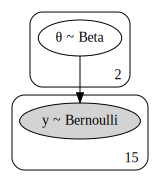

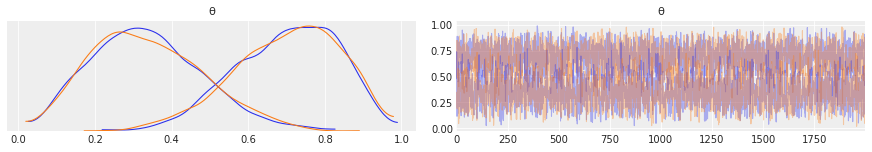

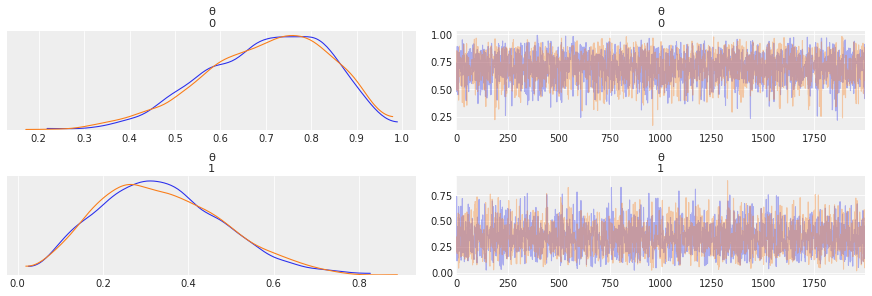

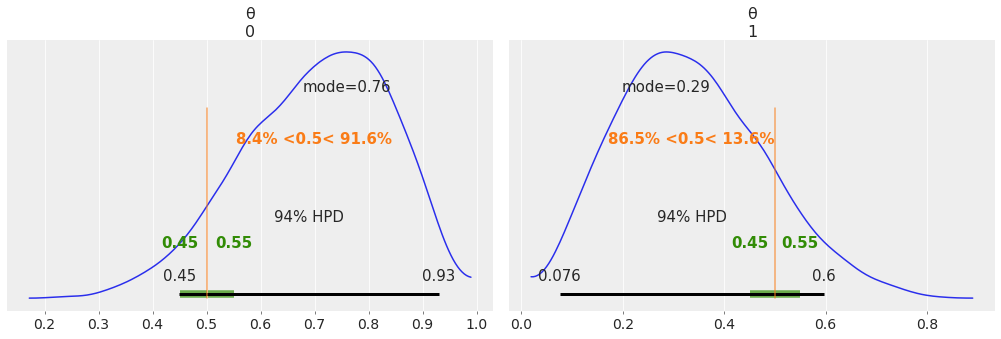

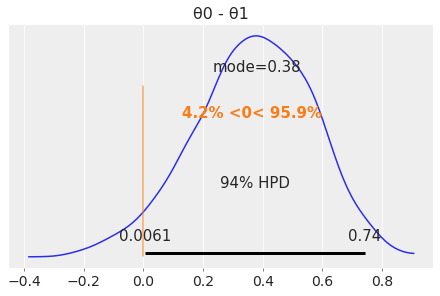

In [4]:
with pm.Model() as model:
  # uniform prior
  θ = pm.Beta('θ', alpha=1., beta=1., shape=groups)
  # likelihood p(y|θ)
  y = pm.Bernoulli('y', p=θ[idx], observed=data['flip'])
  trace = pm.sample(2000, random_seed=123)
  print(az.summary(trace))
  pm.traceplot(trace)
  az.plot_trace(trace)
  az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=0.5, point_estimate='mode')

  _, ax = plt.subplots(1, 1, figsize=(6, 4), constrained_layout=True)
  diff = trace['θ'][:,0] - trace['θ'][:,1]
  az.plot_posterior(diff, ref_val=0, point_estimate='mode', ax=ax)
  ax.set_title('θ0 - θ1') 

pm.model_to_graphviz(model)
